<a href="https://www.kaggle.com/code/htonmoy19/evaluating-different-regression-on-car-prices?scriptVersionId=198975154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
display(test_data.shape)
train_data.info()

(125690, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [3]:
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

missing_value_cols1 = missing_train[missing_train>0]
missing_value_cols2 = missing_test[missing_test>0]
missing_value_df = pd.DataFrame(missing_value_cols1)
missing_value_df['test_data'] = missing_value_cols2
missing_value_df

,0,test_data
fuel_type,5083,3383
accident,2452,1632
clean_title,21419,14239


In [4]:
train_data.duplicated().sum()

0

In [5]:
train_data.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [6]:
train_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
for col in train_data[['fuel_type', 'engine','transmission', 'ext_col', 'int_col', 'accident', 'clean_title']]:
    print("column : ",col,"\nunique values : ",train_data[col].unique(),"\n")

column :  fuel_type 
unique values :  ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported'] 

column :  engine 
unique values :  ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas'
 '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'] 

column :  transmission 
unique values :  ['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic' '1-Speed A/T' '6-Speed A/T' '10-Speed A/T'
 '9-Speed A/T' '8-Speed Automatic' '9-Speed Automatic' '5-Speed A/T'
 'Automatic' '7-Speed Automatic with Auto-Shift' 'CVT Transmission'
 '5-Speed M/T' 'M/T' '6-Speed M/T' '6-Speed Automatic' '4-Speed Automatic'
 '7-Speed M/T' '2-Speed A/T' '1-Speed Automatic' 'Automatic CVT'
 '4-Speed A/T' '6-Speed Manual' 'Transmission Overdrive Switch'
 '8-Sp

In [8]:
train_data.replace('-', np.nan, inplace=True)
test_data.replace('-', np.nan, inplace=True)

train_data['clean_title'] = train_data['clean_title'].fillna('No')
test_data['clean_title'] = test_data['clean_title'].fillna('No')

train_data = train_data.fillna('Missing')
test_data = test_data.fillna('Missing')

In [9]:
# categorical columns to preprocess
categorical_columns = ['brand','model','fuel_type', 'engine','transmission', 'ext_col', 'int_col', 'accident', 'clean_title'] 
# numerical columns to preprocess
numerical_columns = ['model_year', 'milage']

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
LE = LabelEncoder()

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)
    train_data[col] = LE.fit_transform(train_data[col])
    test_data[col] = test_data[col].astype(str)
    test_data[col] = LE.fit_transform(test_data[col])


In [11]:
# feature and target selection
cols = numerical_columns + categorical_columns
X = train_data[cols]
y = train_data['price']
X.head(5)

,model_year,milage,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,-1.559808,2.957842,31,495,2,116,38,312,71,2,1
1,-2.443052,1.557184,28,930,2,366,38,263,10,0,1
2,-2.443052,1.426276,9,1575,1,640,38,38,71,2,1
3,0.206679,-0.927854,16,758,2,863,49,29,14,2,1
4,0.913274,-1.171076,36,1077,2,259,23,29,10,2,1


In [12]:
test_df = test_data[cols]
test_df.shape

(125690, 11)

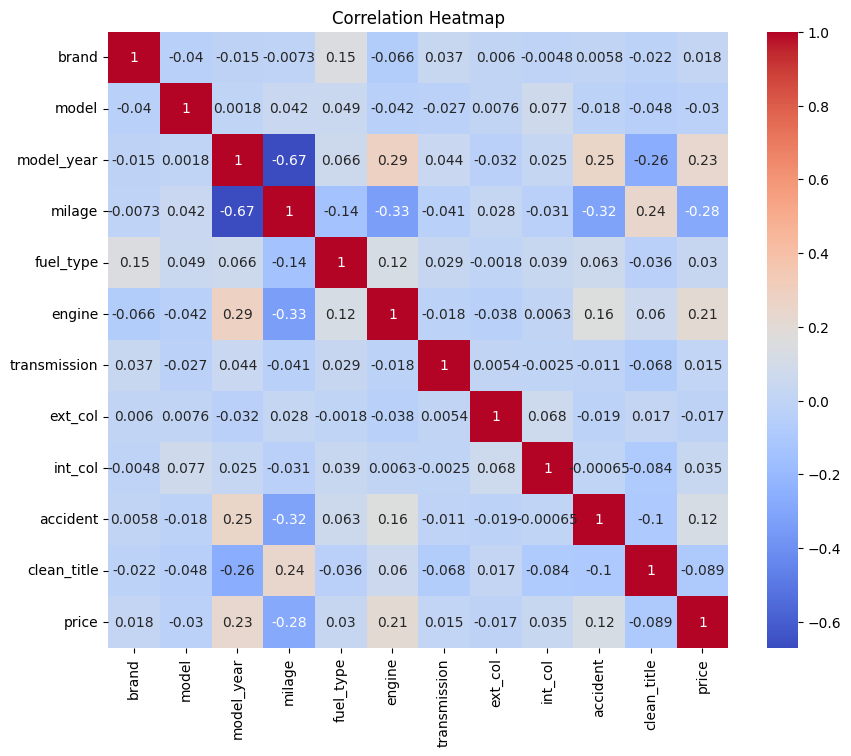

In [13]:
# Correlation Analysis
correlation_matrix = (train_data.drop(['id'],axis=1)).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state =365) 

In [15]:
%%time
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()
LReg.fit(X_train, y_train)
pred_lr = LReg.predict(X_valid)
# calculate RMSE
rmse = sqrt(mean_squared_error(y_valid, pred_lr))
print("RMSE for LinearRegression:", rmse)

RMSE for LinearRegression: 70785.8882669782
CPU times: user 122 ms, sys: 29 ms, total: 151 ms
Wall time: 165 ms


In [16]:
%%time
from xgboost import XGBRegressor
model_xgb = XGBRegressor(objective='reg:squarederror',  
        n_estimators=100,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0,
        reg_alpha=0,
        reg_lambda=1)
model_xgb.fit(X_train, y_train)
pred_1 = model_xgb.predict(X_valid)
# calculate RMSE
rmse = sqrt(mean_squared_error(y_valid, pred_1))
print("RMSE for xgboost:", rmse)

RMSE for xgboost: 68948.30528042585
CPU times: user 3.61 s, sys: 226 ms, total: 3.84 s
Wall time: 1.1 s


In [17]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define and compile ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model
# Initialize ANN model
ann_model = create_ann_model(X_train.shape[1])

# Add EarlyStopping and ReduceLROnPlateau for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, 
              callbacks=[early_stopping, reduce_lr])

# Predict and evaluate
pred_ann = ann_model.predict(X_valid)
rmse_train_ann = sqrt(mean_squared_error(y_valid,pred_ann))
print(f'ANN Model RMSE on Training Data: {rmse_train_ann:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1727735764.774176     104 service.cc:145] XLA service 0x7c0478005930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727735764.774257     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727735764.774263     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 114/3771 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 10727995392.0000 

I0000 00:00:1727735765.809224     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3771/3771 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6732463616.0000 - val_loss: 5698987008.0000 - learning_rate: 0.0010
Epoch 2/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6387002880.0000 - val_loss: 5651161088.0000 - learning_rate: 0.0010
Epoch 3/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5543612928.0000 - val_loss: 5573928960.0000 - learning_rate: 0.0010
Epoch 4/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5701945856.0000 - val_loss: 5448950784.0000 - learning_rate: 0.0010
Epoch 5/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6506627072.0000 - val_loss: 5368248832.0000 - learning_rate: 0.0010
Epoch 6/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5604419584.0000 - val_loss: 5342045696.0000 - learning_rate: 0.0010
Epoch 7/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6377066496.0000 - val_loss: 5322065408.0000 - learning_rate: 0.0010
Epoch 8/50
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6291446784.0000 - val_loss: 5330632192.

In [18]:
ann_model.fit(X, y, epochs=50, batch_size=32, verbose=0, validation_split=0.2, 
              callbacks=[early_stopping, reduce_lr])

In [22]:
prediction = ann_model.predict(test_df)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [23]:
sample_submission['price'] = prediction
sample_submission.head(5)

,id,price
0,188533,19164.291016
1,188534,70632.132812
2,188535,66719.382812
3,188536,24397.201172
4,188537,25165.115234


In [24]:
sample_submission.to_csv("submission.csv", index=False)